# Installing Libraries

In [1]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from albumentations import Compose, PadIfNeeded, RandomCrop, Normalize, HorizontalFlip, ShiftScaleRotate, CoarseDropout
from albumentations.pytorch.transforms import ToTensorV2


# Albumentation - Transformations


In [3]:
class Album_train():
    def __init__(self):
        self.albumentations_transform = Compose([
            HorizontalFlip(),
            ShiftScaleRotate(),
#            Cutout(num_holes=1, max_h_size=8, max_w_size=8, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], always_apply=True, p=1.00),
            CoarseDropout(max_holes=3, max_height=8, max_width=8, min_holes=None, min_height=4, min_width=4, fill_value=[0.4914*255, 0.4822*255, 0.4471*255], mask_fill_value=None, always_apply=False, p=0.7),
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])
    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

class Album_test():
    def __init__(self):
        self.albumentations_transform = Compose([
            Normalize(mean=[0.4914, 0.4822, 0.4471],std=[0.2469, 0.2433, 0.2615]),
            ToTensorV2()
        ])

    def __call__(self,img):
        img = np.array(img)
        img = self.albumentations_transform(image=img)['image']
        return img

# Dataset defining

In [6]:
train = datasets.CIFAR10('./Data',
                            train=True,
                            transform=Album_train(),
                            download=True)

test = datasets.CIFAR10('./Data',
                                train=False,
                                transform=Album_test(),
                                download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 74552488.62it/s]


Extracting ./Data/cifar-10-python.tar.gz to ./Data
Files already downloaded and verified


# Dataloader Arguments & Test/Train Dataloaders


In [7]:
SEED = 10

cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
# Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create.
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=2, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

CUDA Available? True


In [10]:
import src.model
import src.utilities

from src.model import *
from src.utilities import *

## Plotting Random train images

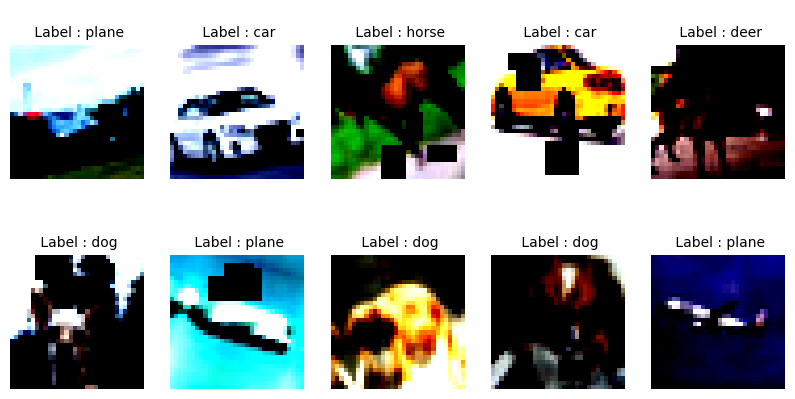

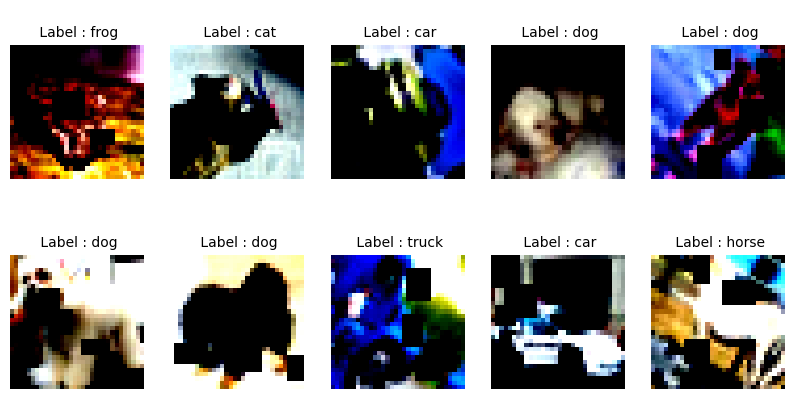

In [15]:
# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

show_images(train_loader)
show_images(train_loader)

# Model Summary


In [12]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
model = Net().to(device)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
              ReLU-6           [-1, 16, 32, 32]               0
       BatchNorm2d-7           [-1, 16, 32, 32]              32
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,440
             ReLU-12           [-1, 16, 16, 16]               0
      BatchNorm2d-13           [-1, 16, 16, 16]              32
          Dropout-14           [-1

# Train and Test of our model

In [14]:
from torch.optim.lr_scheduler import StepLR

train_losses = []
test_losses = []
train_acc = []
test_acc = []

model =  Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

MAX_EPOCHS = 20
for epoch in range(MAX_EPOCHS):
    print("EPOCH:", epoch + 1 )
    train(model, device, train_loader, optimizer, epoch,train_losses, train_acc)
    test(model, device, test_loader,test_losses, test_acc)

EPOCH: 1


Loss=1.743812918663025 Batch_id=390 Accuracy=38.03: 100%|██████████| 391/391 [00:17<00:00, 22.47it/s]



Test set: Average loss: 1.4018, Accuracy: 4873/10000 (48.73%)

EPOCH: 2


Loss=1.3602235317230225 Batch_id=390 Accuracy=48.97: 100%|██████████| 391/391 [00:16<00:00, 23.06it/s]



Test set: Average loss: 1.2148, Accuracy: 5578/10000 (55.78%)

EPOCH: 3


Loss=1.343468427658081 Batch_id=390 Accuracy=53.05: 100%|██████████| 391/391 [00:16<00:00, 23.59it/s]



Test set: Average loss: 1.1001, Accuracy: 6060/10000 (60.60%)

EPOCH: 4


Loss=1.263542652130127 Batch_id=390 Accuracy=56.06: 100%|██████████| 391/391 [00:17<00:00, 22.40it/s]



Test set: Average loss: 1.1354, Accuracy: 5887/10000 (58.87%)

EPOCH: 5


Loss=1.3819057941436768 Batch_id=390 Accuracy=57.56: 100%|██████████| 391/391 [00:17<00:00, 22.10it/s]



Test set: Average loss: 1.0025, Accuracy: 6420/10000 (64.20%)

EPOCH: 6


Loss=1.0997835397720337 Batch_id=390 Accuracy=59.42: 100%|██████████| 391/391 [00:17<00:00, 22.51it/s]



Test set: Average loss: 0.9783, Accuracy: 6525/10000 (65.25%)

EPOCH: 7


Loss=1.2320241928100586 Batch_id=390 Accuracy=60.48: 100%|██████████| 391/391 [00:16<00:00, 23.85it/s]



Test set: Average loss: 0.9258, Accuracy: 6752/10000 (67.52%)

EPOCH: 8


Loss=1.0927023887634277 Batch_id=390 Accuracy=61.54: 100%|██████████| 391/391 [00:17<00:00, 22.19it/s]



Test set: Average loss: 0.8988, Accuracy: 6880/10000 (68.80%)

EPOCH: 9


Loss=1.1850817203521729 Batch_id=390 Accuracy=62.59: 100%|██████████| 391/391 [00:16<00:00, 23.87it/s]



Test set: Average loss: 0.8705, Accuracy: 6894/10000 (68.94%)

EPOCH: 10


Loss=1.1646772623062134 Batch_id=390 Accuracy=63.36: 100%|██████████| 391/391 [00:17<00:00, 22.35it/s]



Test set: Average loss: 0.8518, Accuracy: 6976/10000 (69.76%)

EPOCH: 11


Loss=0.988559901714325 Batch_id=390 Accuracy=63.86: 100%|██████████| 391/391 [00:16<00:00, 23.83it/s]



Test set: Average loss: 0.8196, Accuracy: 7139/10000 (71.39%)

EPOCH: 12


Loss=1.0193312168121338 Batch_id=390 Accuracy=64.45: 100%|██████████| 391/391 [00:16<00:00, 23.83it/s]



Test set: Average loss: 0.8467, Accuracy: 7065/10000 (70.65%)

EPOCH: 13


Loss=0.7790528535842896 Batch_id=390 Accuracy=65.01: 100%|██████████| 391/391 [00:16<00:00, 23.70it/s]



Test set: Average loss: 0.8056, Accuracy: 7191/10000 (71.91%)

EPOCH: 14


Loss=0.8929985165596008 Batch_id=390 Accuracy=65.23: 100%|██████████| 391/391 [00:16<00:00, 23.87it/s]



Test set: Average loss: 0.7788, Accuracy: 7279/10000 (72.79%)

EPOCH: 15


Loss=0.8072980642318726 Batch_id=390 Accuracy=66.26: 100%|██████████| 391/391 [00:17<00:00, 21.75it/s]



Test set: Average loss: 0.7564, Accuracy: 7343/10000 (73.43%)

EPOCH: 16


Loss=0.8402180671691895 Batch_id=390 Accuracy=65.98: 100%|██████████| 391/391 [00:16<00:00, 23.83it/s]



Test set: Average loss: 0.7754, Accuracy: 7310/10000 (73.10%)

EPOCH: 17


Loss=0.9909747242927551 Batch_id=390 Accuracy=66.55: 100%|██████████| 391/391 [00:18<00:00, 21.66it/s]



Test set: Average loss: 0.7613, Accuracy: 7352/10000 (73.52%)

EPOCH: 18


Loss=0.9048669934272766 Batch_id=390 Accuracy=67.05: 100%|██████████| 391/391 [00:16<00:00, 23.01it/s]



Test set: Average loss: 0.7573, Accuracy: 7337/10000 (73.37%)

EPOCH: 19


Loss=0.8889434933662415 Batch_id=390 Accuracy=67.41: 100%|██████████| 391/391 [00:17<00:00, 22.13it/s]



Test set: Average loss: 0.7441, Accuracy: 7409/10000 (74.09%)

EPOCH: 20


Loss=1.2815372943878174 Batch_id=390 Accuracy=67.36: 100%|██████████| 391/391 [00:17<00:00, 21.89it/s]



Test set: Average loss: 0.7437, Accuracy: 7423/10000 (74.23%)



In [16]:
train_losses1 = [t.cpu().item() for t in train_losses]

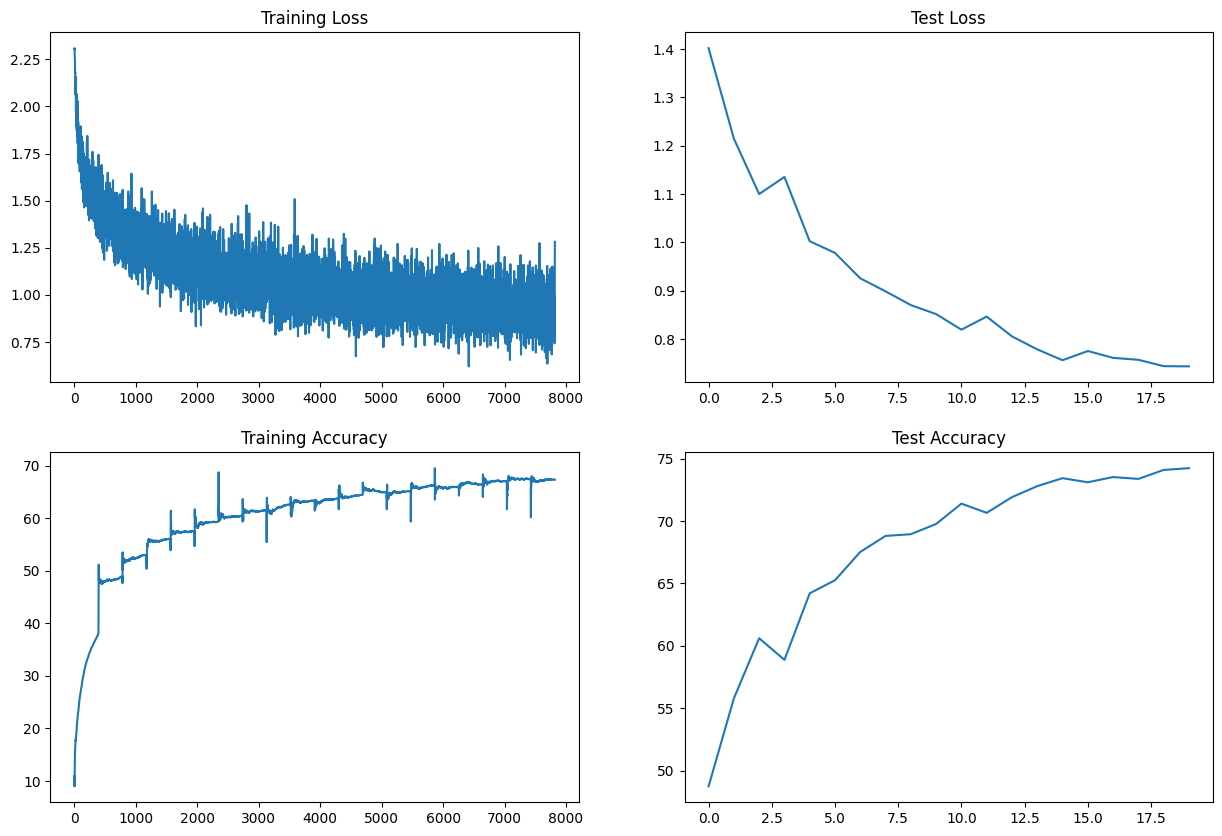

In [17]:
print_graph(train_losses1,train_acc, test_losses,test_acc)

In [18]:
wrong_prediction_list = []
model.eval()
for images, labels in test_loader:
    images, labels = images.to(device), labels.to(device)
    output = model(images)
    pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    match = pred.eq(labels.view_as(pred)).to('cpu').numpy()
    for j, i in enumerate(match):
        if(i == False):
            wrong_prediction_list.append((images[j], pred[j].item(), labels[j].item()))

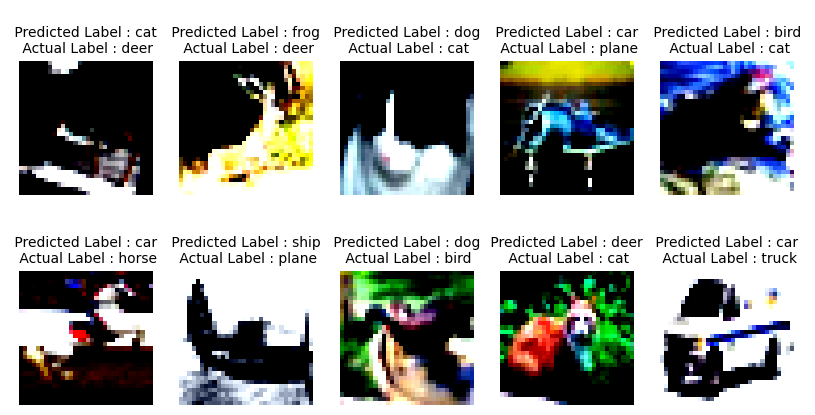

In [20]:
display_incorrect_images(wrong_prediction_list, n=10 )